# 1. Stage One - Determine Business Objectives and Assess the Situation  

With the emergence of bike-sharing, it has become a means of transportation for more and more people to get around because of its convenience and affordability. Shared bikes are mainly in the form of stations. People can go to a bike-sharing station and rent a bike to go anywhere they want. This leads to the question of how many shared bikes are reasonable to park at a station. There are many factors that affect how many bikes people rent, such as weather, time of day, etc. The goal of this project is to predict how many bikes will be rented at a station by using factors such as date and weather to help bike rental companies place bikes more efficiently.


## 1.1 Assess the Current Situation
This report is all about the regression analysis of a bike sharing data set. The data set has been taken from the UCI website. 
- Personnel: Mengnan Wang
- Data: https://archive.ics.uci.edu/ml/machine-learning-databases/00275/
- Computing resources: Microsoft Anaconda with 8GB memory available
- Software: Jupyter Notebook and Python 3.6 including pandas, numpy, matplotlib, seaborn, sklearn libraries.

# 2. Stage  Two - Data Understanding
According to the UCI official website, there are two csv files in the dataset, one is daily bike-sharing data and the other is hourly bike-sharing data. The detailed columns of each file are as follows: 

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## 2.1 Initial Data Acquisition
Data source: Bike Sharing Dataset

File name: "hour.csv" & "day.csv"

Path: https://archive.ics.uci.edu/ml/machine-learning-databases/00275/

In [145]:
#import libraries required
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#read data
data_hour = pd.read_csv('hour.csv')
data_day = pd.read_csv('day.csv')

## 2.2 Describe Data
- hour.csv  
There are 17 columns in the hourly bike sharing dataset and totally include 17379 rows. Except "dteday" column is in object data type, the other columns are all numeric datatype. However, some of these columns have categorical properties, such as "season", "holiday", "weathersit", etc. We need to change them to the categorical features manually. 
- day.csv  
The daily bike sharing dataset contains 16 columns and 731 rows. The rest of the information are as same as the hourly bike sharing dataset

In [146]:
# check the top 5 columns of both hourly and daily datasets
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [147]:
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [148]:
#check the total rows and columns
data_hour.shape

(17379, 17)

In [149]:
data_day.shape

(731, 16)

In [150]:
#show the headers of each column
data_hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [151]:
data_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [152]:
# drop the instant column since it's just an index of the dataset
data_hour, data_day = data_hour.drop('instant', axis=1), data_day.drop('instant', axis=1)

In [153]:
# see the number of non-values and datatype of each variable. We can see that each column has 17379 non-null,
# which means there is no null or missing value
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [154]:
# there is no missing or null value in the daily bike sharing dataset as well
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [155]:
# set season, holiday, workingday, weathersit coulmns to categorical features
# set the rest of the columns except "cnt" columnt to numberic features
category_features = ['season', 'holiday', 'workingday', 'weathersit','yr']
number_features_hourly = ['temp', 'atemp', 'hum', 'windspeed', 'hr', 'weekday', 'mnth']
number_features_daily = ['temp', 'atemp', 'hum', 'windspeed', 'weekday', 'mnth']

# "cnt" column will be the target feature
target = ['cnt']

for col in category_features:
    data_hour[col] = data_hour[col].astype('category')
    data_day[col] = data_day[col].astype('category')

data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dteday      17379 non-null  object  
 1   season      17379 non-null  category
 2   yr          17379 non-null  category
 3   mnth        17379 non-null  int64   
 4   hr          17379 non-null  int64   
 5   holiday     17379 non-null  category
 6   weekday     17379 non-null  int64   
 7   workingday  17379 non-null  category
 8   weathersit  17379 non-null  category
 9   temp        17379 non-null  float64 
 10  atemp       17379 non-null  float64 
 11  hum         17379 non-null  float64 
 12  windspeed   17379 non-null  float64 
 13  casual      17379 non-null  int64   
 14  registered  17379 non-null  int64   
 15  cnt         17379 non-null  int64   
dtypes: category(5), float64(4), int64(6), object(1)
memory usage: 1.5+ MB


In [156]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dteday      731 non-null    object  
 1   season      731 non-null    category
 2   yr          731 non-null    category
 3   mnth        731 non-null    int64   
 4   holiday     731 non-null    category
 5   weekday     731 non-null    int64   
 6   workingday  731 non-null    category
 7   weathersit  731 non-null    category
 8   temp        731 non-null    float64 
 9   atemp       731 non-null    float64 
 10  hum         731 non-null    float64 
 11  windspeed   731 non-null    float64 
 12  casual      731 non-null    int64   
 13  registered  731 non-null    int64   
 14  cnt         731 non-null    int64   
dtypes: category(5), float64(4), int64(5), object(1)
memory usage: 61.5+ KB


## 2.3 Verify Data Quality
  
The quality of the both dataset are good enough because there are no missing or null or duplicated values. The datasets are ready to do the data exploration


In [157]:
#see if we have any duplicated value
data_hour.duplicated().sum()

0

In [158]:
data_day.duplicated().sum()

0

## 2.4 Initial Data Exploration



In [159]:
#explore the "cnt" attribute
data_hour.describe()

,mnth,hr,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,6.537775,11.546752,3.003683,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,3.438776,6.914405,2.005771,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,7.000000,12.000000,3.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,10.000000,18.000000,5.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,12.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [160]:
data_day.describe()

,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,6.519836,2.997264,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,3.451913,2.004787,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,7.000000,3.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,10.000000,5.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,12.000000,6.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


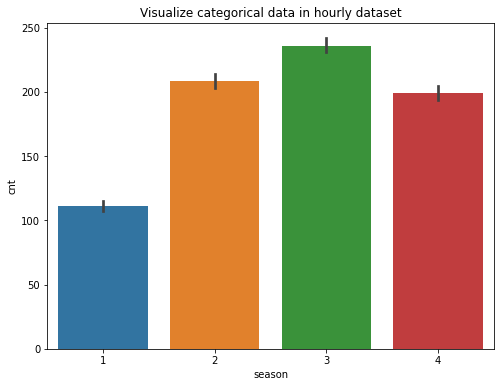

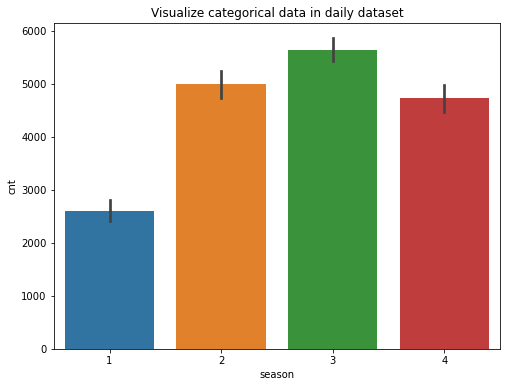

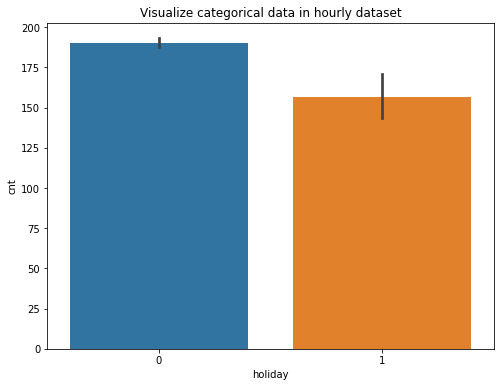

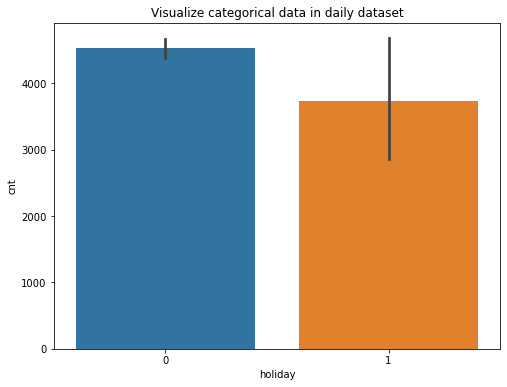

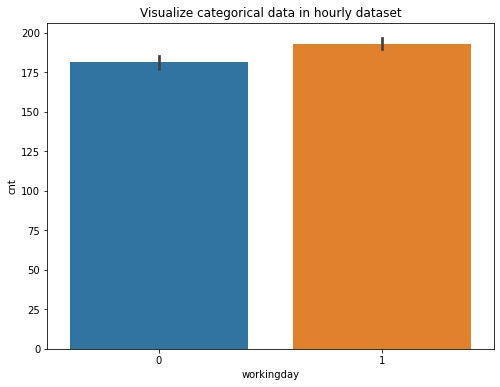

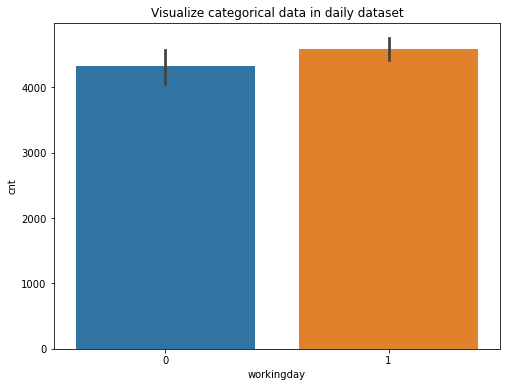

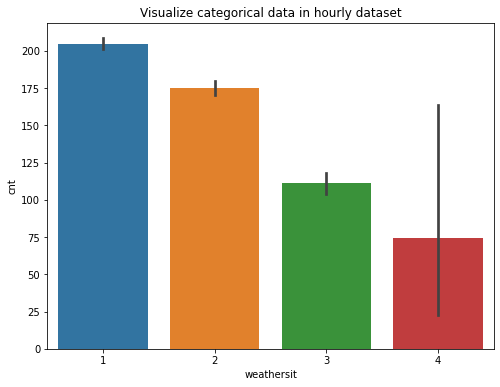

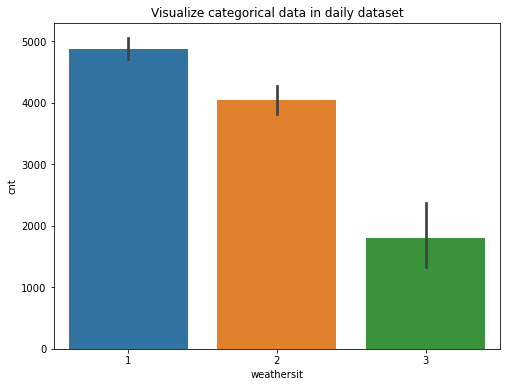

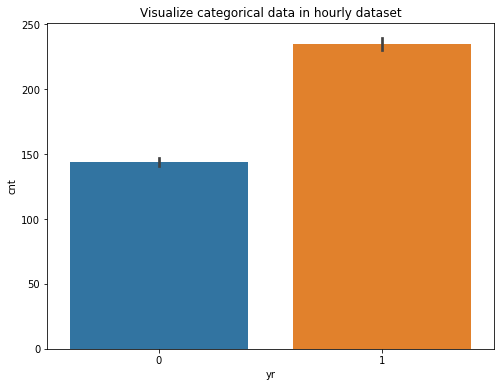

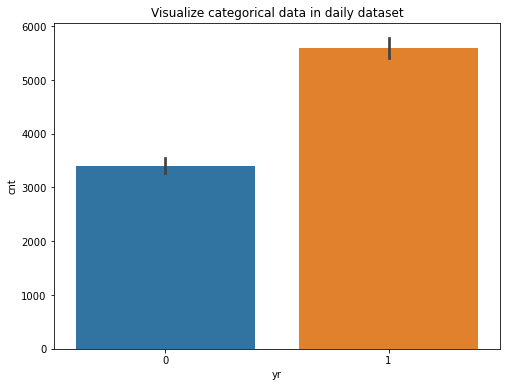

In [161]:
for name in category_features:
    plt.figure(figsize=(8,6))
    plt.title('Visualize categorical data in hourly dataset')
    sns.barplot(data=data_hour, x=name, y='cnt')
    plt.figure(figsize=(8,6))
    plt.title('Visualize categorical data in daily dataset')
    sns.barplot(data=data_day, x=name, y='cnt')

### <span style='background :yellow' > Insights </span>
<span style='color: Blue'> For categorical features, the overall trend of these two datasets is roughly the same:  
    1. People rent the highest number of bikes in the summer  
    2. The number of bikes rentals during non-holiday periods, which means working days, is higher than during holiday periods.  
    3. People prefer rent bikes in clear or few clouds weather. The worse the weather, the less people rent bikes.  
    4. The overall number of rental shared bikes in 2012 is more than in 2011.
</span>

<AxesSubplot:xlabel='hr', ylabel='cnt'>

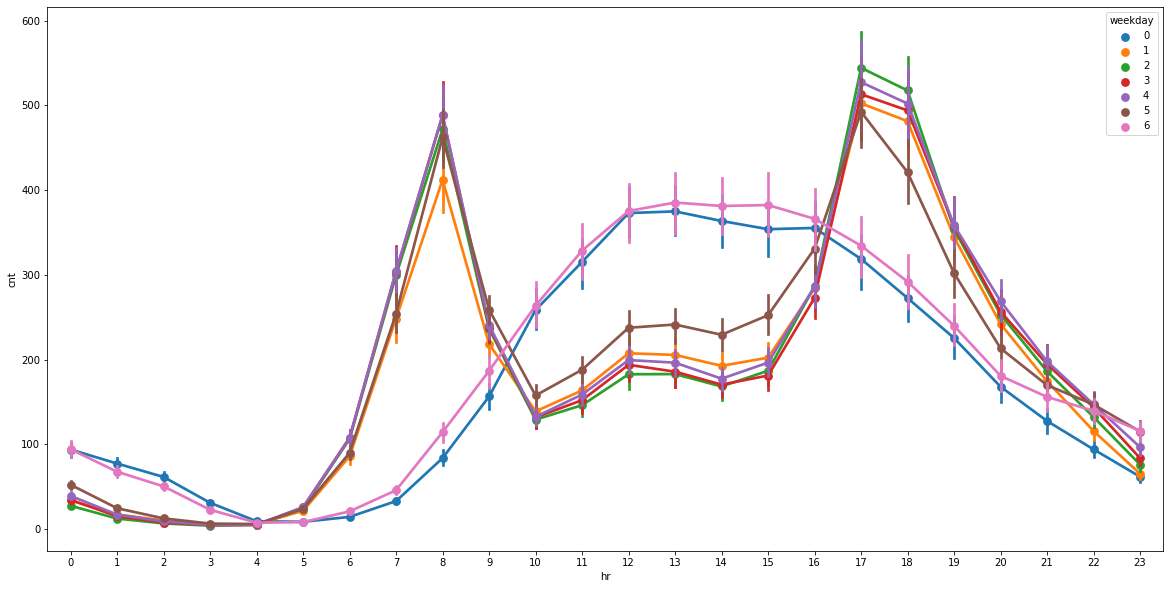

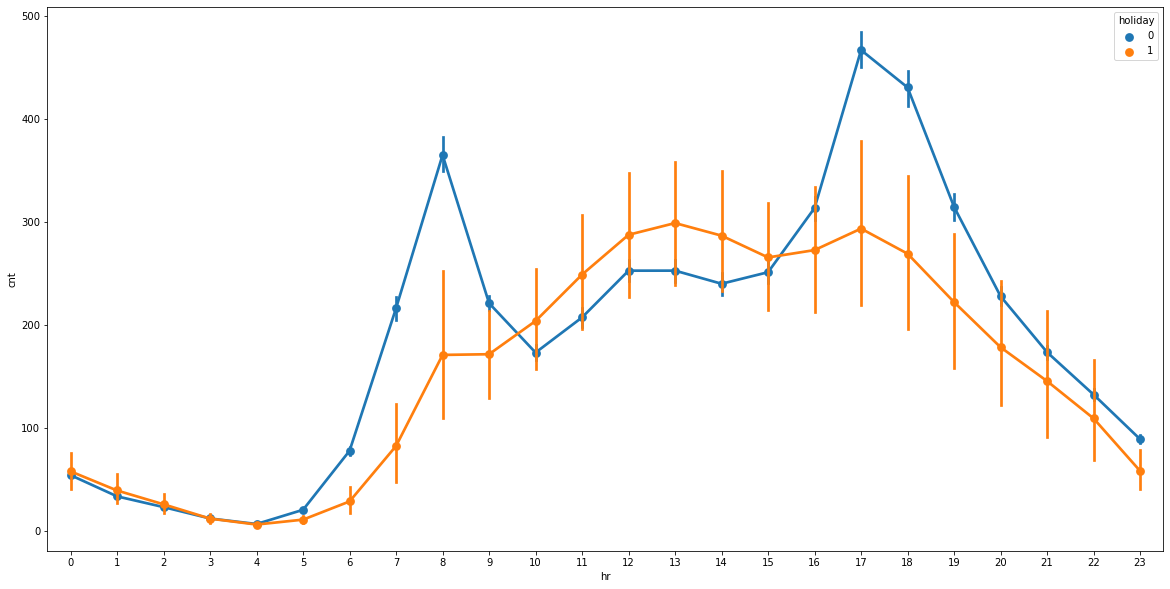

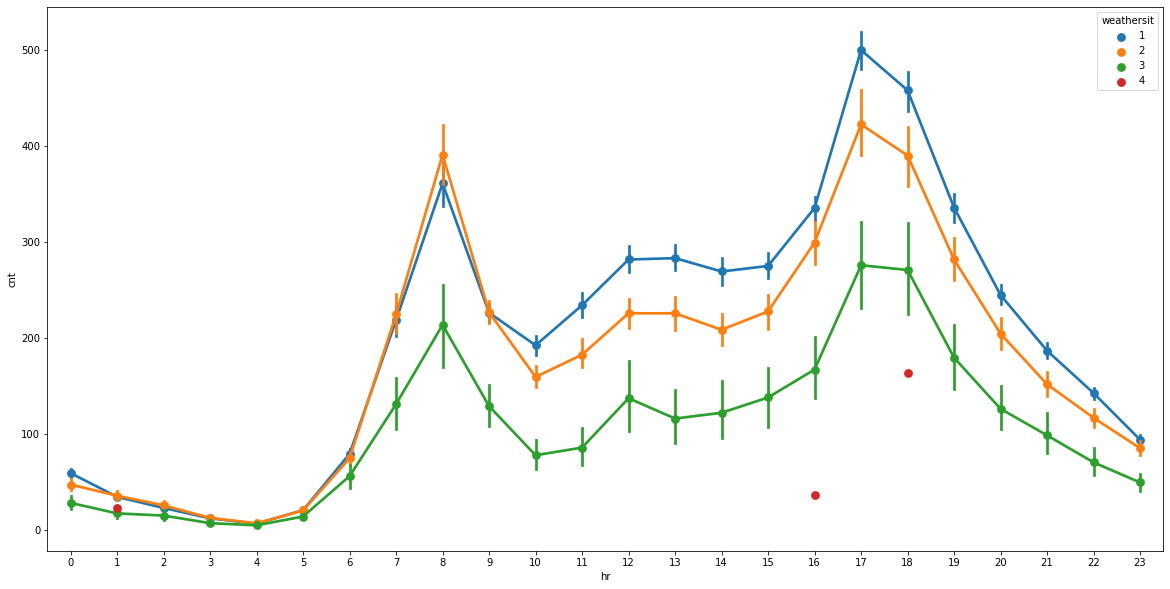

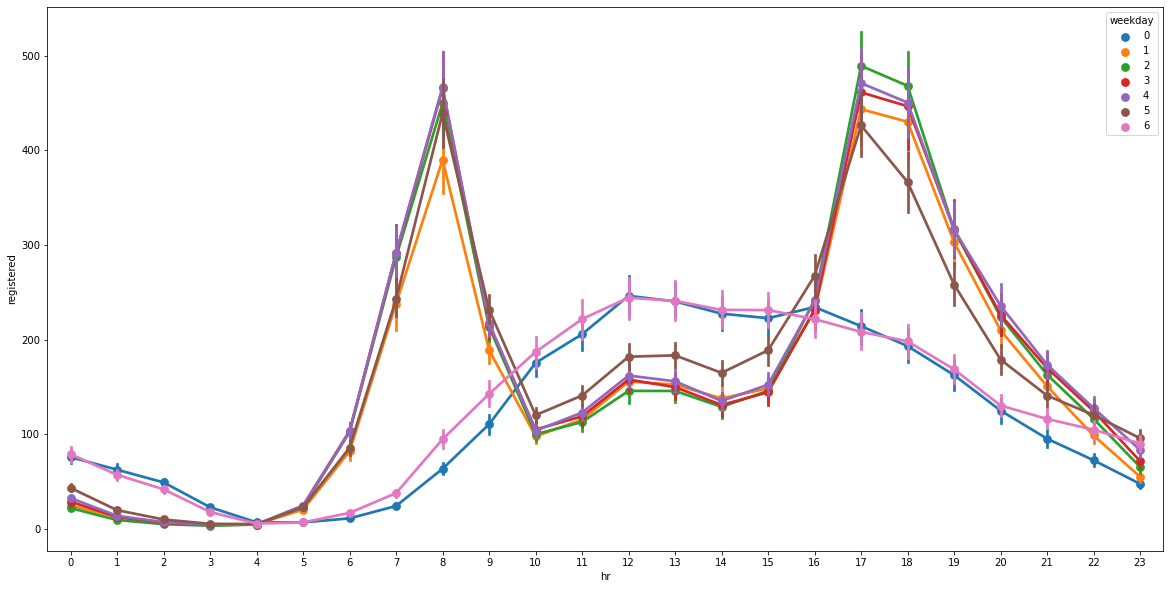

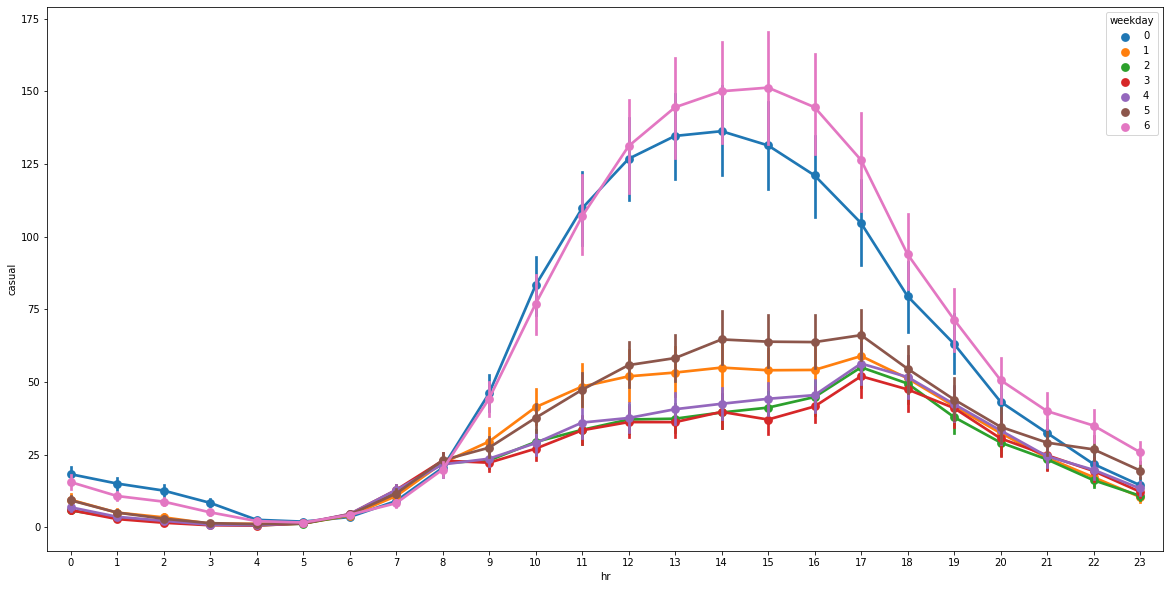

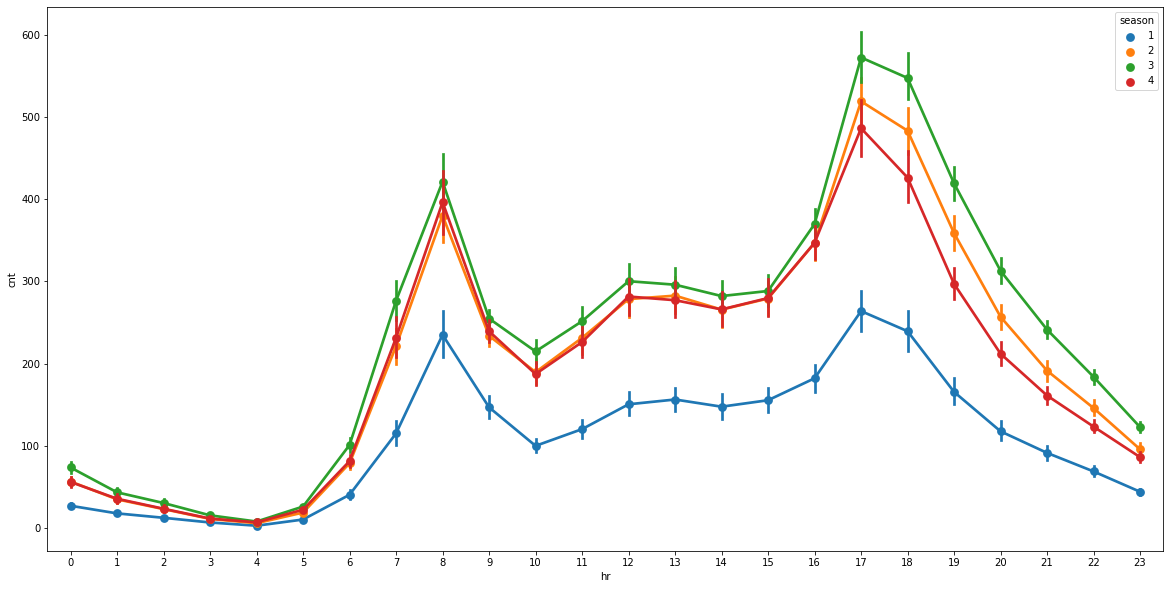

In [162]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data_hour, x='hr', y='cnt', hue='weekday')
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data_hour, x='hr', y='cnt', hue='holiday')
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data_hour, x='hr', y='cnt', hue='weathersit')
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data_hour, x='hr', y='registered', hue='weekday')
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data_hour, x='hr', y='casual', hue='weekday')
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data_hour, x='hr', y='cnt', hue='season')

### <span style='background :yellow' > Insights </span>
<span style='color: Blue'> From the pointplots above, we can see some patterns of hourly bike rental:  
    1. People on workingdays(Monday to Friday), the peak time for bike rental is around 7am -8am and 5pm - 6pm. However on holidays, peak time for bike rental is 12pm - 4pm.  
    2. On clear or few clouds weather days, more people prefer to rent bikes.  
    3. Registered users usually rent bikes on weekdays and peak time is around 7am -8am and 5pm - 6pm. Causual users usually rent bikes on non-workingdays and the peak time is 12pm - 5pm.  
    4. During spring, summer, and fall, more bikes are rented than in winter.
    
</span>

<AxesSubplot:xlabel='yr', ylabel='cnt'>

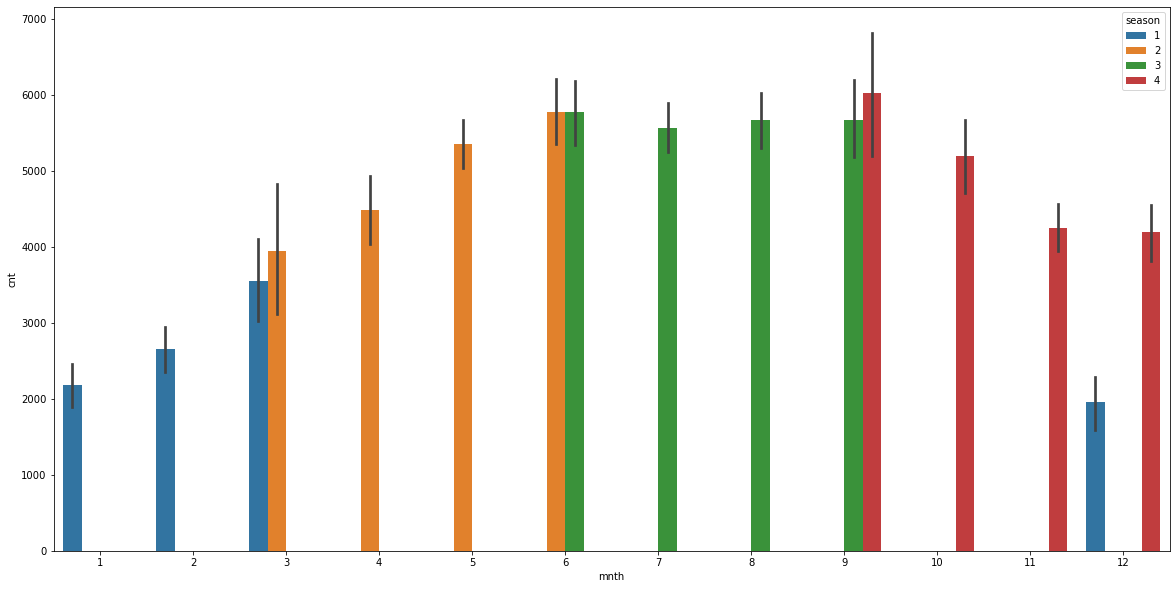

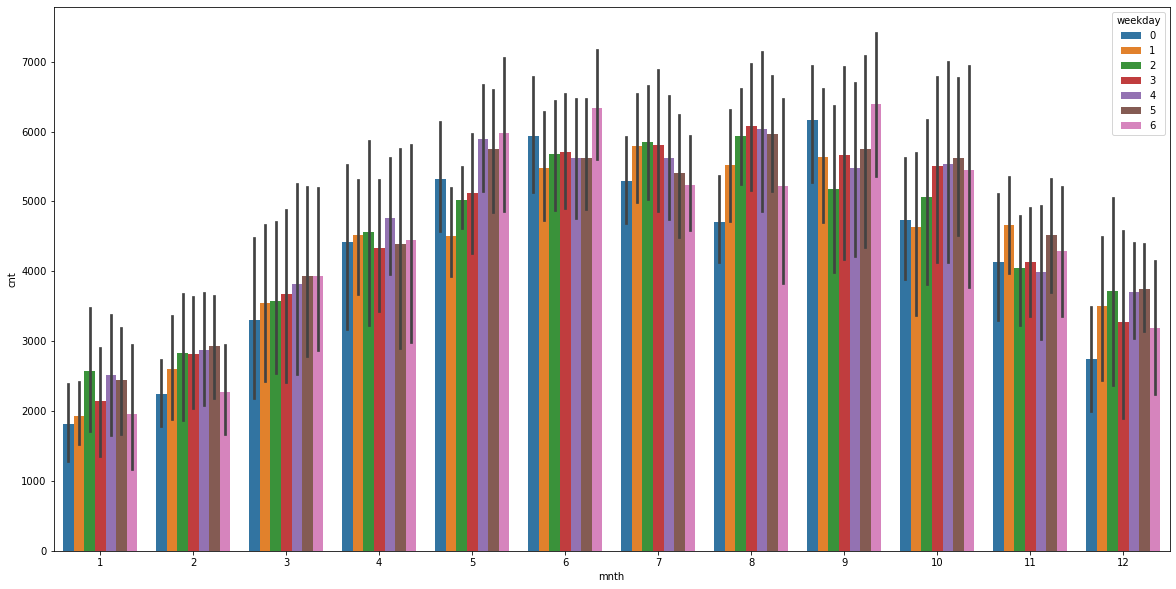

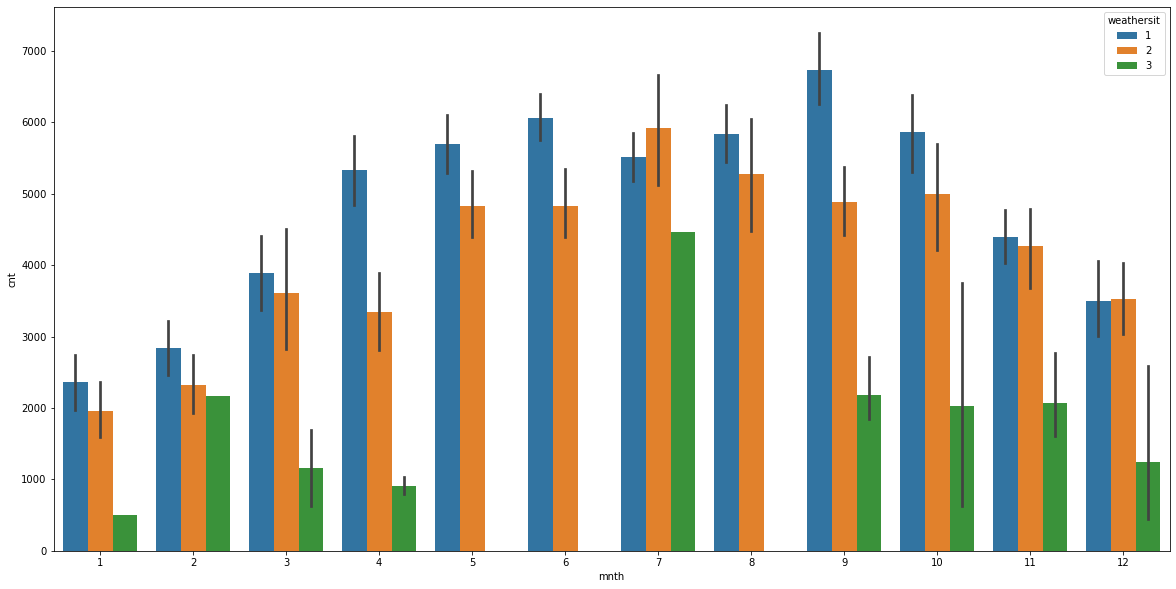

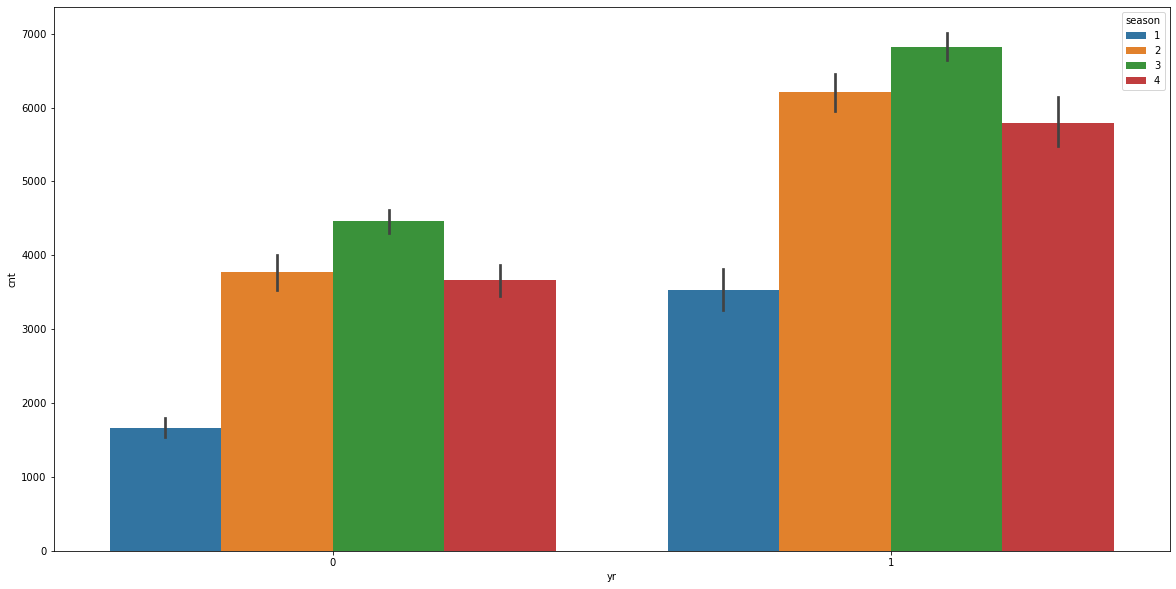

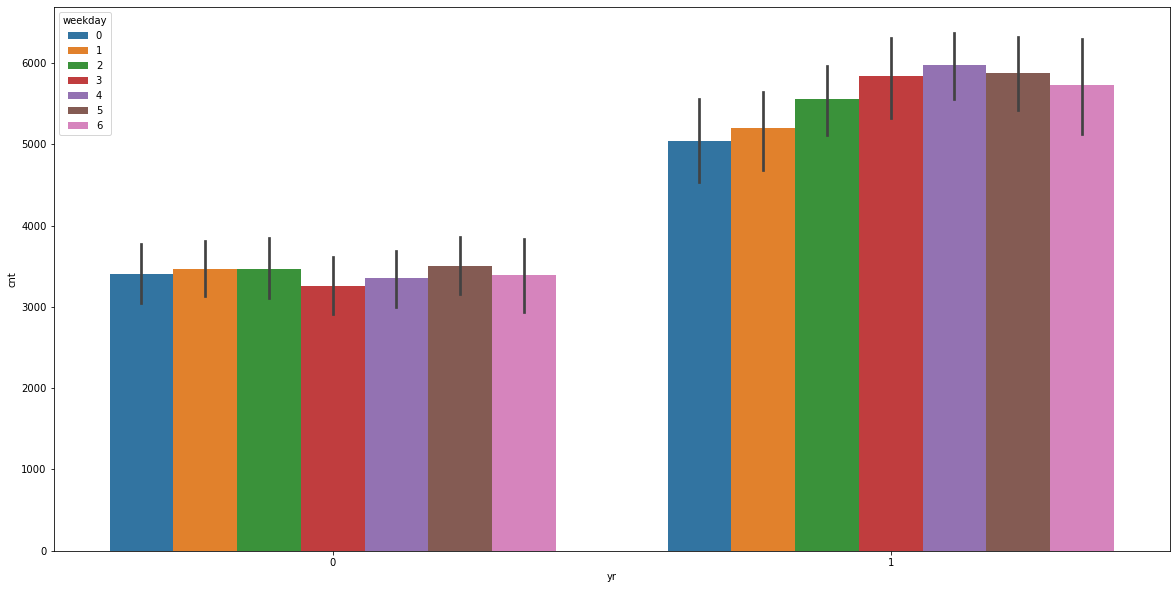

In [163]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data_day, x='mnth', y='cnt', hue='season')
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data_day, x='mnth', y='cnt', hue='weekday')
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data_day, x='mnth', y='cnt', hue='weathersit')
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data_day, x='yr', y='cnt', hue='season')
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data_day, x='yr', y='cnt', hue='weekday')

### <span style='background :yellow' > Insights </span>
<span style='color: Blue'> From the pointplots above, we can see some patterns of daily bike rental:  
    The number of bike rentals is highest between June and September, because the weather and temperature are relatively comfortable and more people are willing to rent a bike to transport themselves.
    
</span>

### 2.4.1 Correlations
The following is a correlation charts between the numeric features of hourly bike sharing dataset and daily bike sharing dataset. We can see the correlation between each variable in datasets. If we look at the last row, we can see the relationship between each variable and the number of rental bikes. 

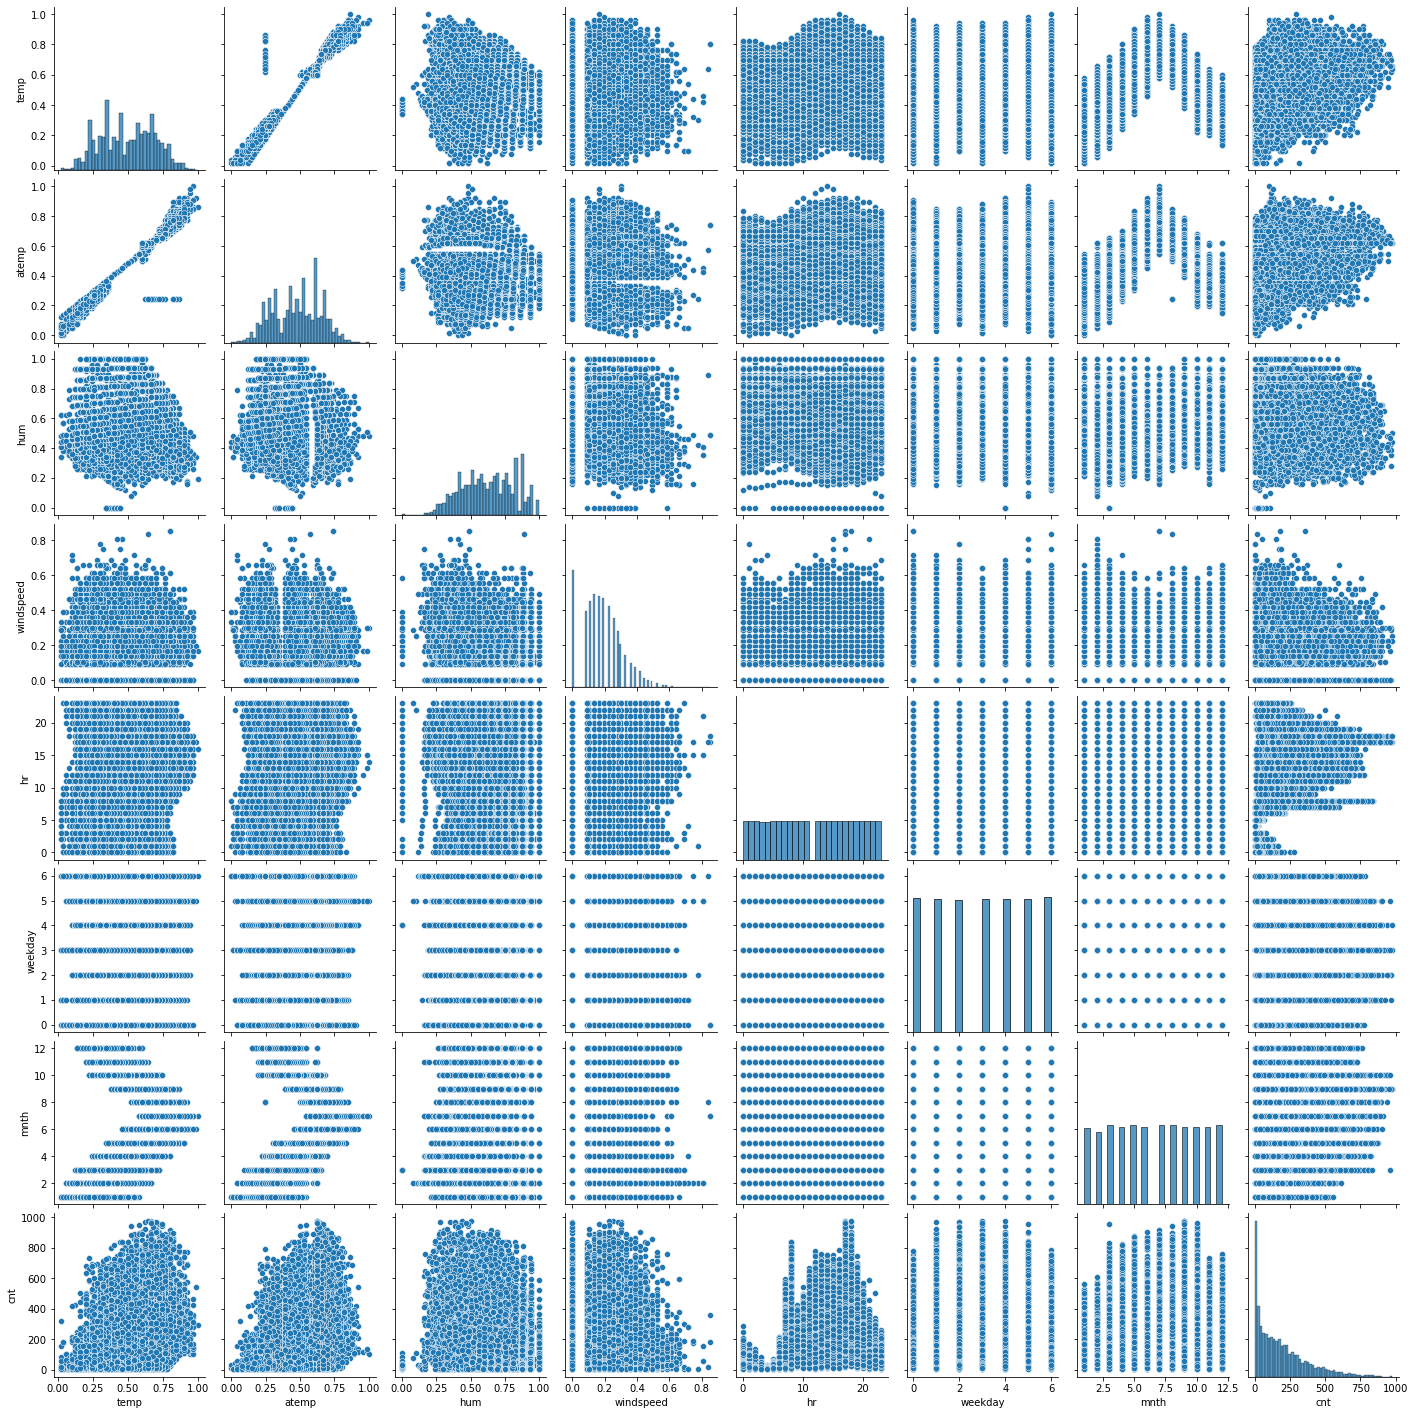

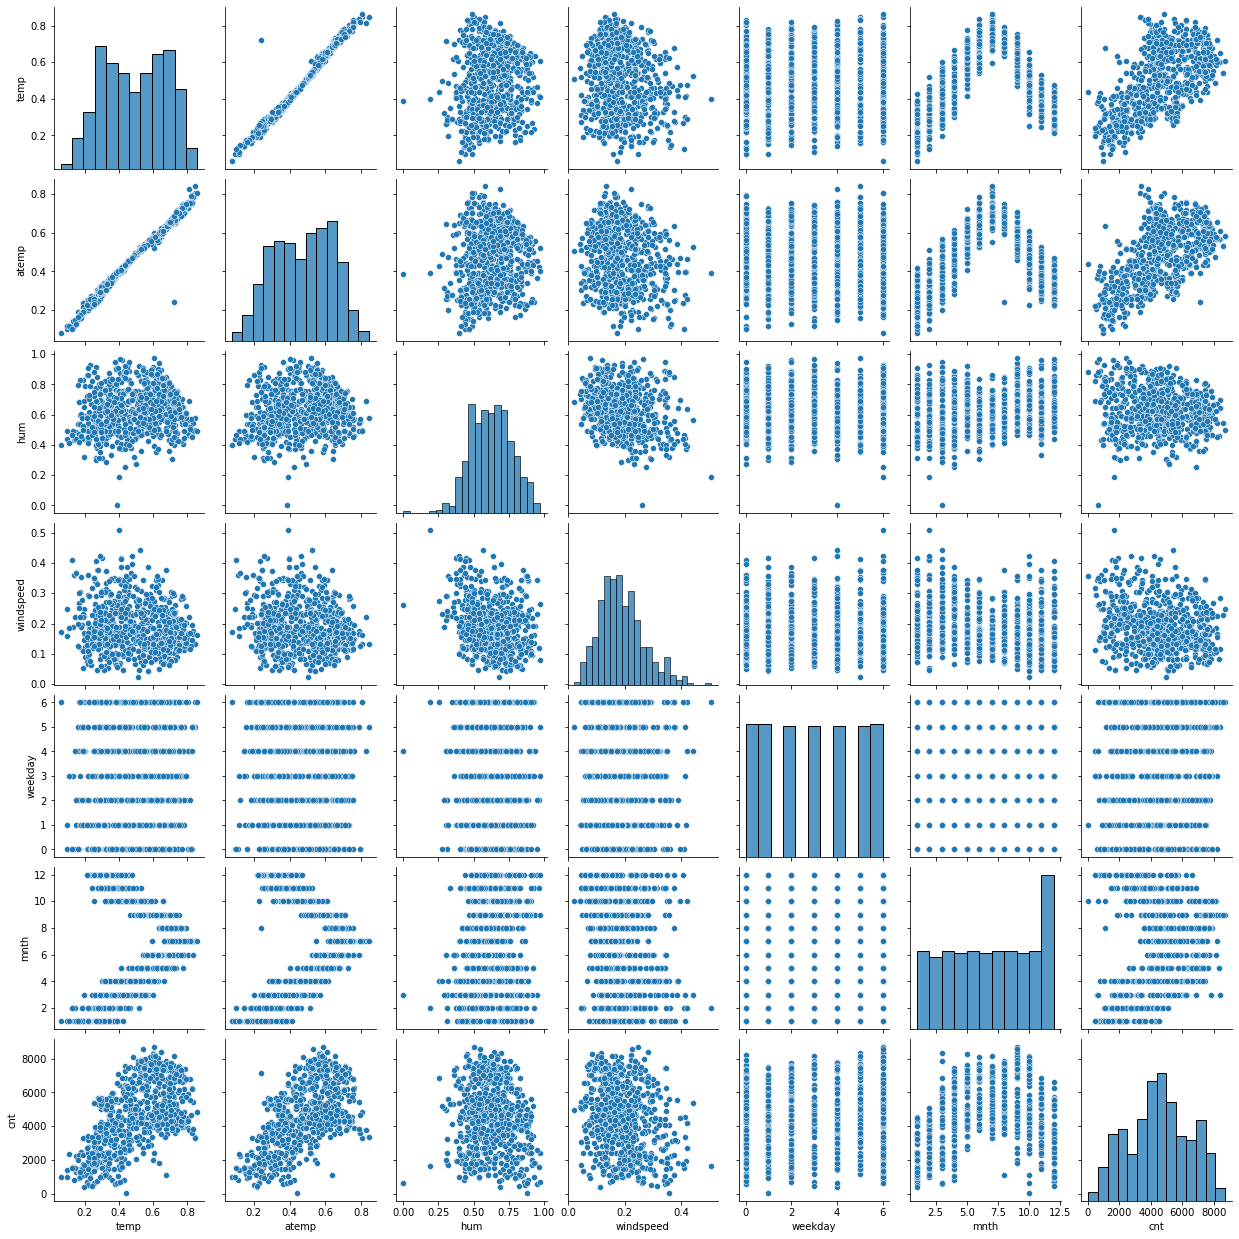

In [164]:
sns.pairplot(data_hour[number_features_hourly + target])
plt.show()
sns.pairplot(data_day[number_features_daily + target])
plt.show()

### <span style='background :yellow' > Insights </span>
<span style='color: Blue'> From the pairplots above, we can see the relationship between each variable:  
    1. If we focus on the last row, we can see that the higher the tempreture, the more number of bikes are rented.  
    2. The higher the huminity, the more bike are rented.  
    3. The lower the windspeed, the more bike are rented.  
    4. temp and atemp variables show a linear relationship.  
</span>

<AxesSubplot:>

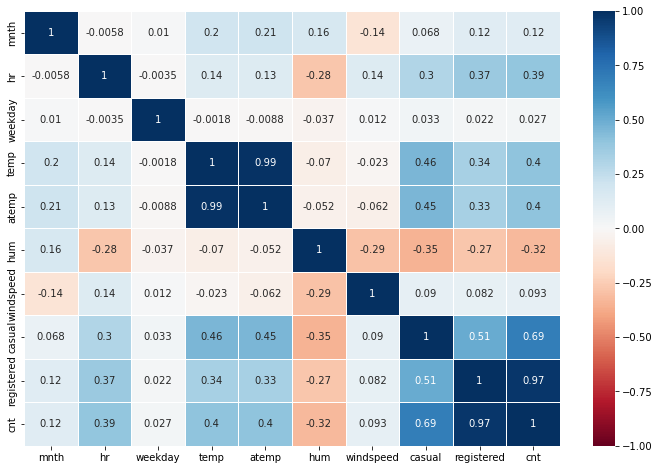

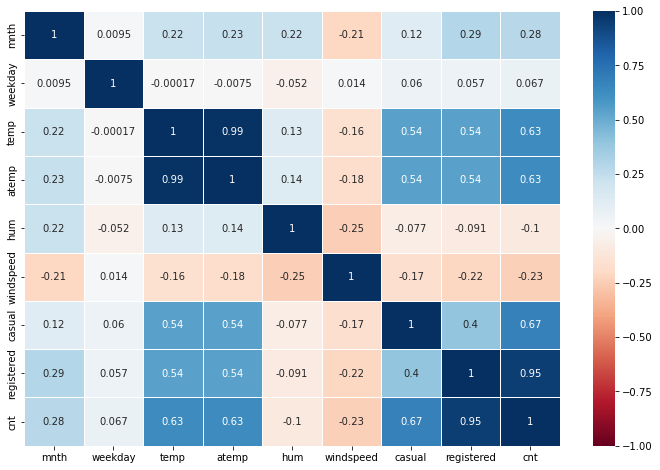

In [165]:
plt.figure(figsize=(12,8))
sns.heatmap(data_hour.corr(),annot=True,linewidth = 0.5, vmin=-1, vmax=1, cmap = 'RdBu')
plt.figure(figsize=(12,8))
sns.heatmap(data_day.corr(),annot=True,linewidth = 0.5, vmin=-1, vmax=1, cmap = 'RdBu')

### <span style='background :yellow' > Insights </span>
<span style='color: Blue'> From the heatmap above, we can observe that some features are positively correlated and some are negatively correlated. For example, temp and atemp are highly positively correlated, the correlated accuracy is 99%, which means that these two vairables might contain the same information. cnt and registered are also highly positively correlated. Therefore, wee need to consider drop some of the highly correlated variables to avoid leakage issues.
</span>


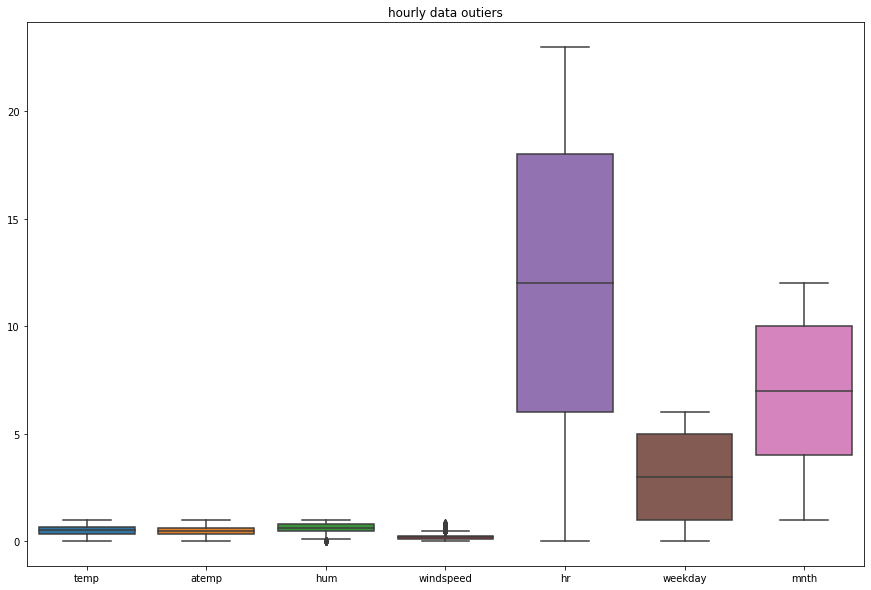

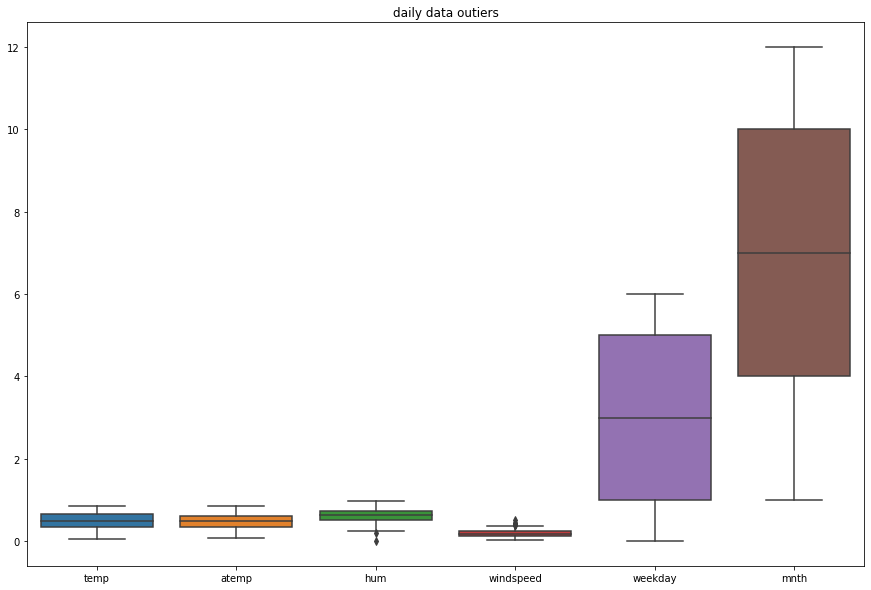

In [166]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data_hour[number_features_hourly])
ax.set_title('hourly data outiers')
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data_day[number_features_daily])
ax.set_title('daily data outiers')
plt.show()

### <span style='background :yellow' > Insights </span>
<span style='color: Blue'> From the boxplots above, we can observe that the quality of numeric features data a pretty good. Only hum and windspeed variables have a little bit outliers. We will replace these outliers by median later. 
</span>


# 3. Stage Three - Data Preparation


As I mentioned before, casual and registered columns may cause leakage and for that reason, we need to remove one of them. However, I decide to remove both casual and registered columns because  when we want to predict the total number of bike rentals, we will only depends on the "known" features. Whether a user is casual or registered information will not be provided in the future prediction, so these two variables are noting helpful for our model training. We will drop both of them.

In addtion, temp and atemp are strongly correlated and it might cause muticollinearity problem. So, we only need to keep one of them. We will remove the atemp column. Same as holiday and workingday, we also need to drop one of them.

Besides, dteday and yr are not important to our model prediction, so we remove these two columns as well.

In [167]:
# drop the 'casual' and 'registered', 'dteday', 'atemp', 'year' columns
data_hour = data_hour.drop(['dteday','casual', 'registered', 'atemp', 'yr','holiday'], axis=1)
data_day = data_day.drop(['dteday','casual', 'registered', 'atemp', 'yr','holiday'], axis=1)
category_features.remove('holiday')
category_features.remove('yr')
number_features_daily.remove('atemp')
number_features_hourly.remove('atemp')
data_hour

,season,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,6,0,1,0.24,0.81,0.0000,16
1,1,1,1,6,0,1,0.22,0.80,0.0000,40
2,1,1,2,6,0,1,0.22,0.80,0.0000,32
3,1,1,3,6,0,1,0.24,0.75,0.0000,13
4,1,1,4,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,1,1,2,0.26,0.60,0.1642,119
17375,1,12,20,1,1,2,0.26,0.60,0.1642,89
17376,1,12,21,1,1,1,0.26,0.60,0.1642,90
17377,1,12,22,1,1,1,0.26,0.56,0.1343,61


In [168]:
data_day

,season,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,6,0,2,0.344167,0.805833,0.160446,985
1,1,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,1,1,1,1,0.196364,0.437273,0.248309,1349
3,1,1,2,1,1,0.200000,0.590435,0.160296,1562
4,1,1,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...
726,1,12,4,1,2,0.254167,0.652917,0.350133,2114
727,1,12,5,1,2,0.253333,0.590000,0.155471,3095
728,1,12,6,0,2,0.253333,0.752917,0.124383,1341
729,1,12,0,0,1,0.255833,0.483333,0.350754,1796


In [169]:
# one hot encoding the categorical columns
data_hour = pd.get_dummies(data_hour, prefix=category_features, drop_first=True)
data_day = pd.get_dummies(data_day, prefix=category_features, drop_first=True)
data_hour

,mnth,hr,weekday,temp,hum,windspeed,cnt,season_2,season_3,season_4,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,1,0,6,0.24,0.81,0.0000,16,0,0,0,0,0,0,0
1,1,1,6,0.22,0.80,0.0000,40,0,0,0,0,0,0,0
2,1,2,6,0.22,0.80,0.0000,32,0,0,0,0,0,0,0
3,1,3,6,0.24,0.75,0.0000,13,0,0,0,0,0,0,0
4,1,4,6,0.24,0.75,0.0000,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,12,19,1,0.26,0.60,0.1642,119,0,0,0,1,1,0,0
17375,12,20,1,0.26,0.60,0.1642,89,0,0,0,1,1,0,0
17376,12,21,1,0.26,0.60,0.1642,90,0,0,0,1,0,0,0
17377,12,22,1,0.26,0.56,0.1343,61,0,0,0,1,0,0,0


In [170]:
data_day

,mnth,weekday,temp,hum,windspeed,cnt,season_2,season_3,season_4,workingday_1,weathersit_2,weathersit_3
0,1,6,0.344167,0.805833,0.160446,985,0,0,0,0,1,0
1,1,0,0.363478,0.696087,0.248539,801,0,0,0,0,1,0
2,1,1,0.196364,0.437273,0.248309,1349,0,0,0,1,0,0
3,1,2,0.200000,0.590435,0.160296,1562,0,0,0,1,0,0
4,1,3,0.226957,0.436957,0.186900,1600,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
726,12,4,0.254167,0.652917,0.350133,2114,0,0,0,1,1,0
727,12,5,0.253333,0.590000,0.155471,3095,0,0,0,1,1,0
728,12,6,0.253333,0.752917,0.124383,1341,0,0,0,0,1,0
729,12,0,0.255833,0.483333,0.350754,1796,0,0,0,0,0,0


In [171]:
# a function that use to sort the column and return Return the bounds of first 25% and the last 25%
def outlier_treatment(column):
    sorted(column)
    Q1,Q3 = np.percentile(column , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

# find the lowerbound and upperbouond of hum column in hourly dataset
lowerbound,upperbound = outlier_treatment(data_hour.hum)
data_hour[(data_hour.hum < lowerbound) | (data_hour.hum > upperbound)]
# replace the outliers by median
data_hour['hum'] = np.where(data_hour['hum'] > upperbound, 0.630000, data_hour['hum'])
data_hour['hum'] = np.where(data_hour['hum'] < lowerbound, 0.630000, data_hour['hum'])

In [172]:
# find the lowerbound and upperbouond of windspeed column in hourly dataset
lowerbound,upperbound = outlier_treatment(data_hour.windspeed)
data_hour[(data_hour.windspeed < lowerbound) | (data_hour.windspeed > upperbound)]
# replace the outliers by median
data_hour['windspeed'] = np.where(data_hour['windspeed'] > upperbound, 0.194000, data_hour['windspeed'])
data_hour['windspeed'] = np.where(data_hour['windspeed'] < lowerbound, 0.194000, data_hour['windspeed'])

In [173]:
# find the lowerbound and upperbouond of hum column in daily dataset
lowerbound,upperbound = outlier_treatment(data_day.hum)
data_day[(data_day.hum < lowerbound) | (data_day.hum > upperbound)]
# replace the outliers by median
data_day['hum'] = np.where(data_day['hum'] > upperbound, 0.644388, data_day['hum'])
data_day['hum'] = np.where(data_day['hum'] < lowerbound, 0.644388, data_day['hum'])

In [174]:
# find the lowerbound and upperbouond of windspeed column in daily dataset
lowerbound,upperbound = outlier_treatment(data_day.windspeed)
data_day[(data_day.windspeed < lowerbound) | (data_day.windspeed > upperbound)]
# replace the outliers by median
data_day['windspeed'] = np.where(data_day['windspeed'] > upperbound, 0.326928, data_day['windspeed'])
data_day['windspeed'] = np.where(data_day['windspeed'] < lowerbound, 0.326928, data_day['windspeed'])

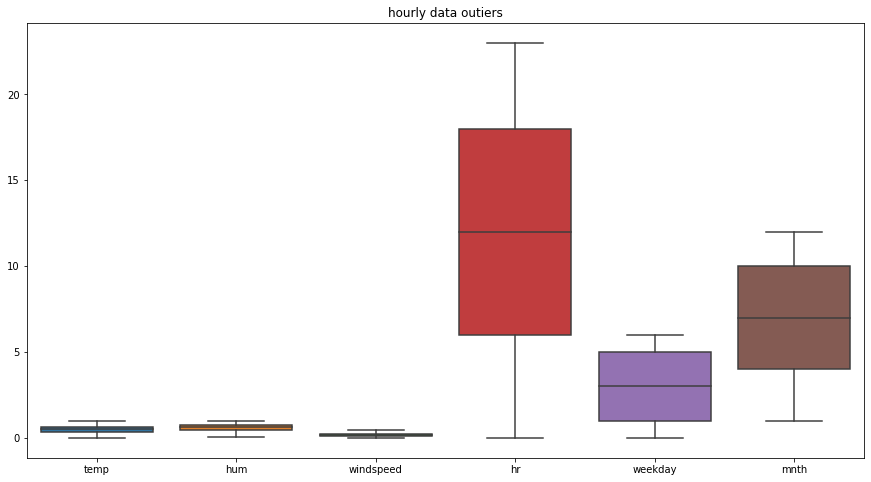

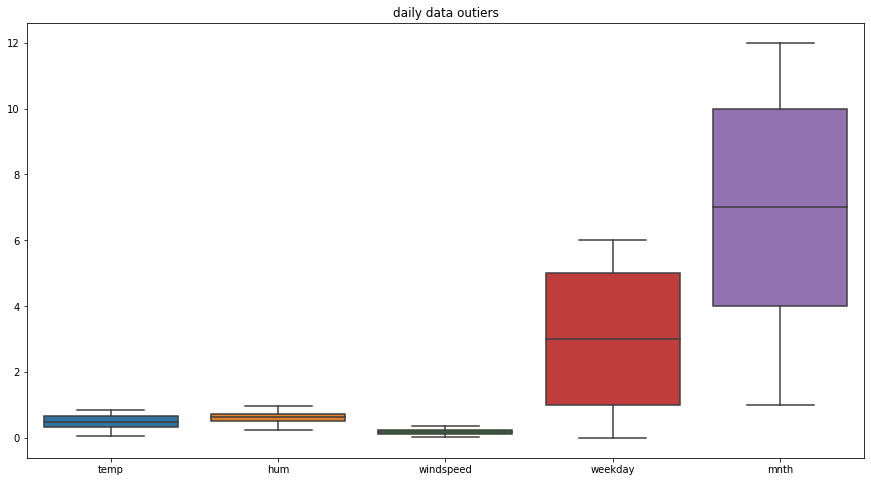

In [175]:
# plot again to make sure there are no outliers in the both datasets
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=data_hour[number_features_hourly])
ax.set_title('hourly data outiers')
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=data_day[number_features_daily])
ax.set_title('daily data outiers')
plt.show()

In [176]:
# normalize numeric columns
from sklearn.preprocessing import MinMaxScaler
def normalize(data, cols):
    scaler = MinMaxScaler()
    data[cols] = scaler.fit_transform(data[cols])
    return data
data_hour = normalize(data_hour, number_features_hourly)
data_day = normalize(data_day, number_features_daily)
data_hour

,mnth,hr,weekday,temp,hum,windspeed,cnt,season_2,season_3,season_4,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,0.0,0.000000,1.000000,0.224490,0.793478,0.000000,16,0,0,0,0,0,0,0
1,0.0,0.043478,1.000000,0.204082,0.782609,0.000000,40,0,0,0,0,0,0,0
2,0.0,0.086957,1.000000,0.204082,0.782609,0.000000,32,0,0,0,0,0,0,0
3,0.0,0.130435,1.000000,0.224490,0.728261,0.000000,13,0,0,0,0,0,0,0
4,0.0,0.173913,1.000000,0.224490,0.728261,0.000000,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,0.826087,0.166667,0.244898,0.565217,0.354874,119,0,0,0,1,1,0,0
17375,1.0,0.869565,0.166667,0.244898,0.565217,0.354874,89,0,0,0,1,1,0,0
17376,1.0,0.913043,0.166667,0.244898,0.565217,0.354874,90,0,0,0,1,0,0,0
17377,1.0,0.956522,0.166667,0.244898,0.521739,0.290253,61,0,0,0,1,0,0,0


In [177]:
data_day

,mnth,weekday,temp,hum,windspeed,cnt,season_2,season_3,season_4,workingday_1,weathersit_2,weathersit_3
0,0.0,1.000000,0.355170,0.767981,0.388102,985,0,0,0,0,1,0
1,0.0,0.000000,0.379232,0.615202,0.635752,801,0,0,0,0,1,0
2,0.0,0.166667,0.171000,0.254904,0.635105,1349,0,0,0,1,0,0
3,0.0,0.333333,0.175530,0.468123,0.387681,1562,0,0,0,1,0,0
4,0.0,0.500000,0.209120,0.254464,0.462471,1600,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.666667,0.243025,0.555105,0.921356,2114,0,0,0,1,1,0
727,1.0,0.833333,0.241986,0.467517,0.374116,3095,0,0,0,1,1,0
728,1.0,1.000000,0.241986,0.694316,0.286721,1341,0,0,0,0,1,0
729,1.0,0.000000,0.245101,0.319025,0.923102,1796,0,0,0,0,0,0


# 4. Stage Four - Modelling


To find the best model, each dataset is going to train 6 models, which are LinearRegression, Ridge, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, and AdaBoostRegressor. To evaluate the model performance, we are going to use the mean absolute error score. I put all the models in a list and create three functions to achieve model training. The aim of creating functions is to avoid repeatedly coding. We can train 6 models together by using the "train_model" function below. 

In addition, we also need to visualize the prediction results. So, I create another function that use to plot the prediction results. 

Finally, we are using RandomizedSearchCV method to find the best hyperparameters of each dataset and train the model again. Out goal is to find the best model from the 6 models above and use the best hyperparameters to minimize the mean absolute score.

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection

# create a model list that use to train hourly and daily datasets
models = [LinearRegression(), 
          Ridge(random_state=42), 
          DecisionTreeRegressor(random_state=42), 
          RandomForestRegressor(random_state=42), 
          GradientBoostingRegressor(random_state=42),
          AdaBoostRegressor(random_state=42)]


# split data function that use to split data into training and testing dataset
def split_data(dataset):  
    '''
    input: 
        - dataset: the dataset that need to be split
    Output:
        - X_train: input variables dataset use to train the model
        - X_test: input variables dataset use to test the model
        - y_train: output variable(cnt) dataset use to train the model
        - y_test: output variable(cnt) dataset use to test the model
    '''
    X_train, X_test, y_train, y_test = train_test_split(dataset.drop('cnt', axis=1), dataset['cnt'], test_size=0.25, random_state=42)
    return X_train, X_test, y_train, y_test
    
    
# train models function that use to train the models in "models" list and put predition result into a list
def train_model(X_train, X_test, y_train, y_test):
    '''
    Input:
        - X_train: input variables dataset use to train the model
        - X_test: input variables dataset use to test the model
        - y_train: output variable(cnt) dataset use to train the model
        - y_test: output variable(cnt) dataset use to test the model
    Output:
        - pred_list: a list that contains all the model's predict results
    '''
    pred_list = []
    for model in models:
        model.fit(X_train, y_train) 
        pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, pred)
        score = model.score(X_test, y_test)
        pred_list.append(pred)

        print(type(model).__name__, ': [mae]', mae, ', [r2]', score)
    return pred_list

# plot prediction function that use to visualize prediction results
def plot_pred(test, pred):
    '''
    Input: 
        - test: a splited cnt data from original dataset
        - pred: a list that contains all the model's predict results
    Output:
        - graphs of comparing the original data and predict data (x-axis: true value; y-axis: predict value)
    '''
    for i in pred:
        plt.figure(figsize=(10,8))
        plot=plt.scatter(test, i)
        plot.axes.set_xlabel('True Values ')
        plot.axes.set_ylabel('Predictions ')

    

LinearRegression : [mae] 106.33548643569388 , [r2] 0.35376695674439895
Ridge : [mae] 106.34612692806436 , [r2] 0.35371394288502
DecisionTreeRegressor : [mae] 55.94695051783659 , [r2] 0.7403638454475716
RandomForestRegressor : [mae] 43.41277652474109 , [r2] 0.8610756263723195
GradientBoostingRegressor : [mae] 56.15223896650042 , [r2] 0.7885540596854008
AdaBoostRegressor : [mae] 89.39393887622249 , [r2] 0.587738310339599


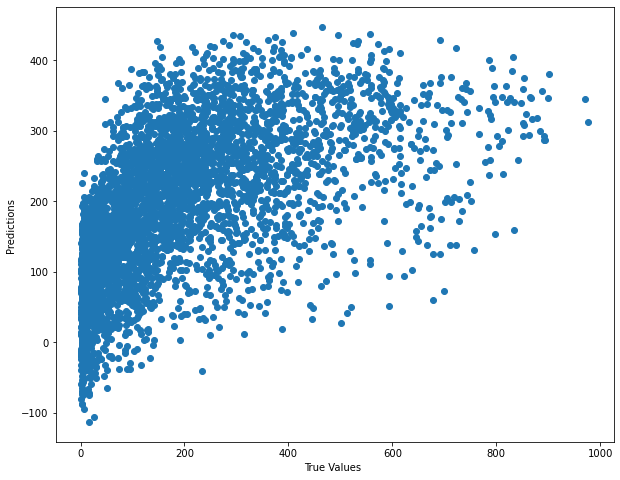

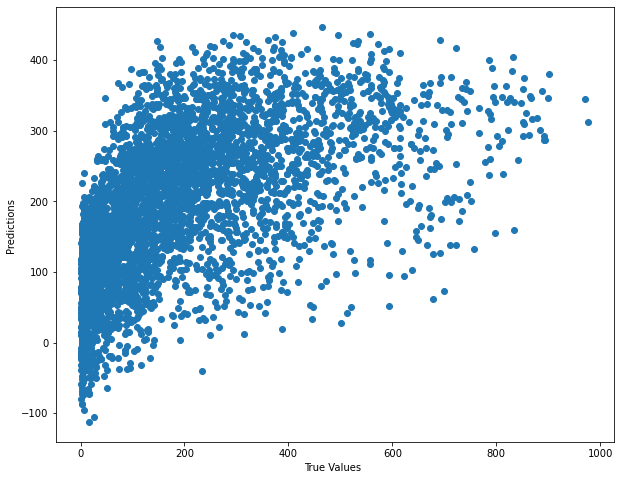

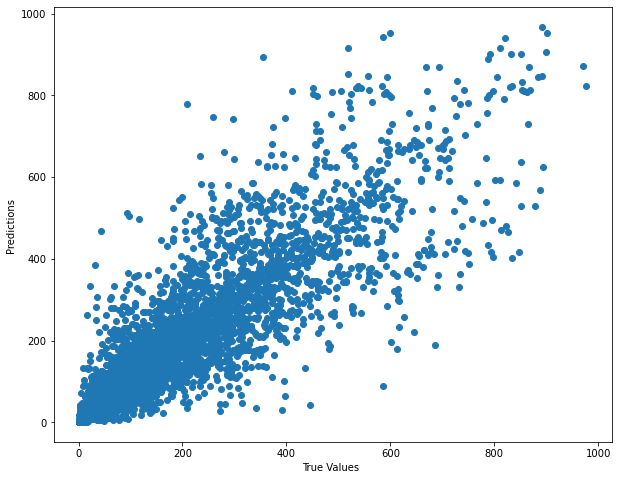

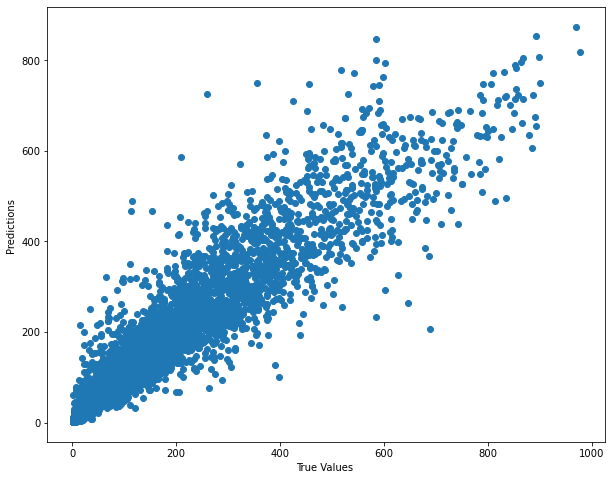

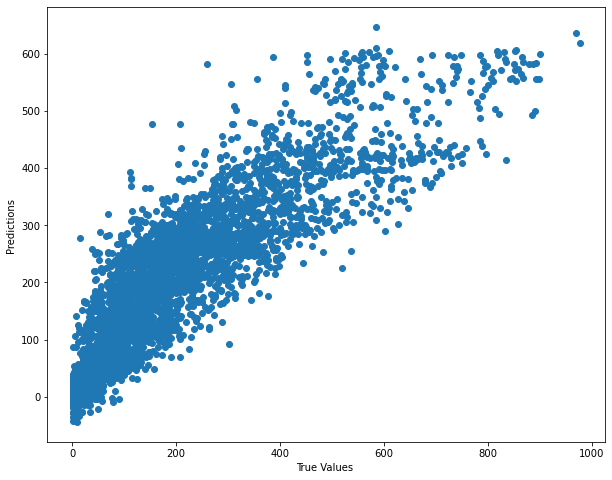

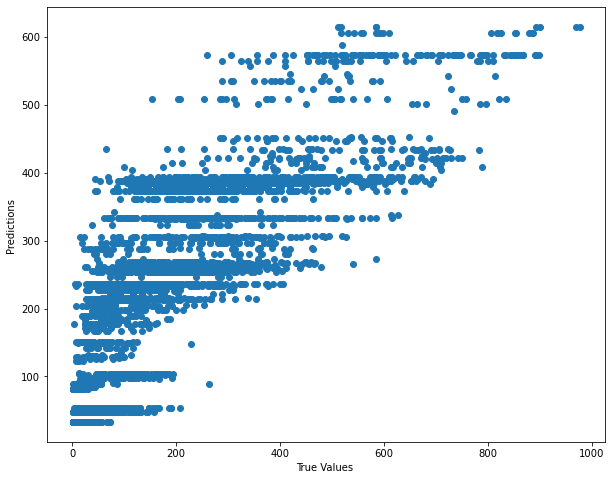

In [179]:
'''
1. split hourly data into training and testing dataset
2. train each model of the models list and print the mae score
3. plot each model's prediction results
'''
X_train_hr, X_test_hr, y_train_hr, y_test_hr = split_data(data_hour)
pred_list_hr = train_model(X_train_hr, X_test_hr, y_train_hr, y_test_hr)
plot_pred(y_test_hr,pred_list_hr)

LinearRegression : [mae] 1119.3905586831597 , [r2] 0.5698959505371195
Ridge : [mae] 1126.8205331996016 , [r2] 0.5665603071802826
DecisionTreeRegressor : [mae] 1349.9890710382513 , [r2] 0.17850324474010582
RandomForestRegressor : [mae] 1042.6748087431695 , [r2] 0.593783048935826
GradientBoostingRegressor : [mae] 1017.574935792724 , [r2] 0.6215419474457398
AdaBoostRegressor : [mae] 1076.6460964659232 , [r2] 0.601055910134396


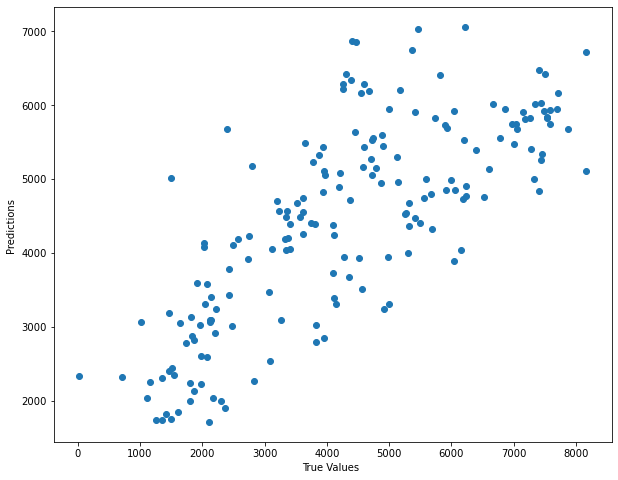

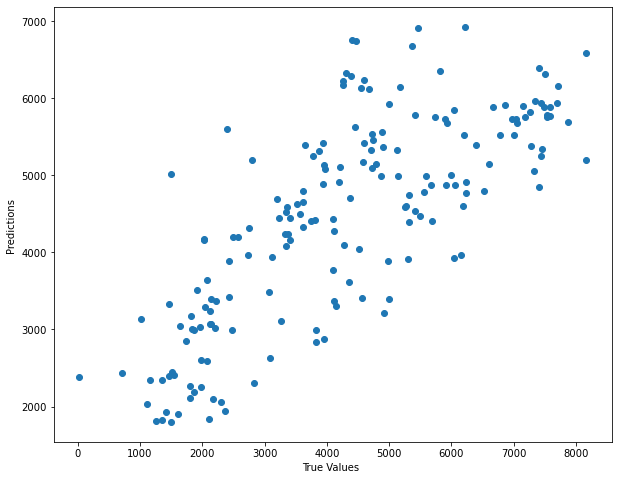

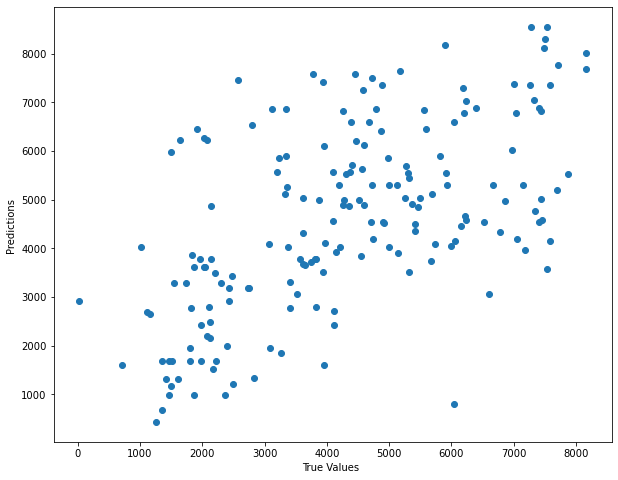

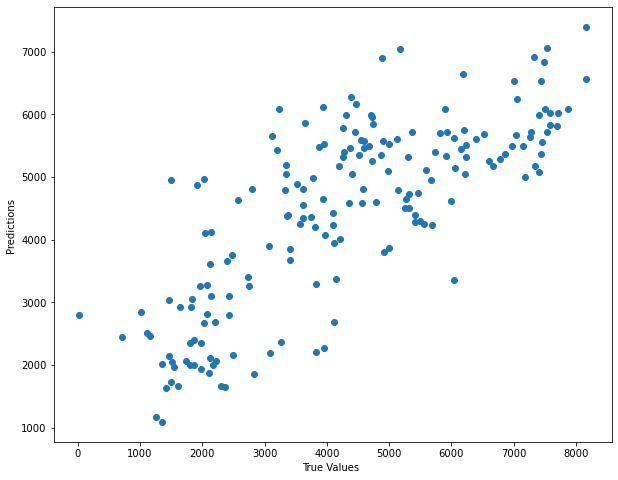

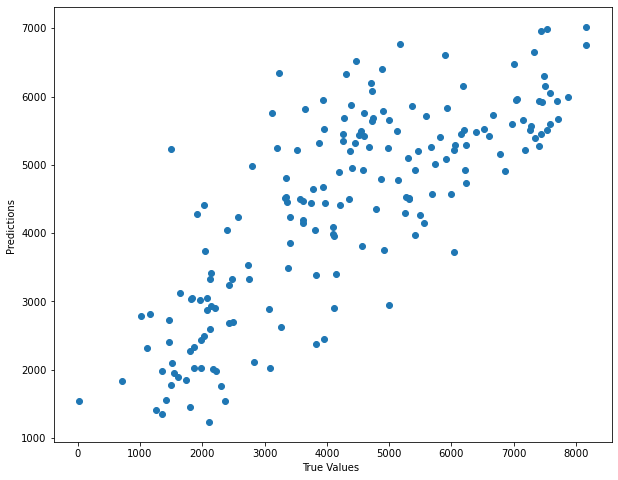

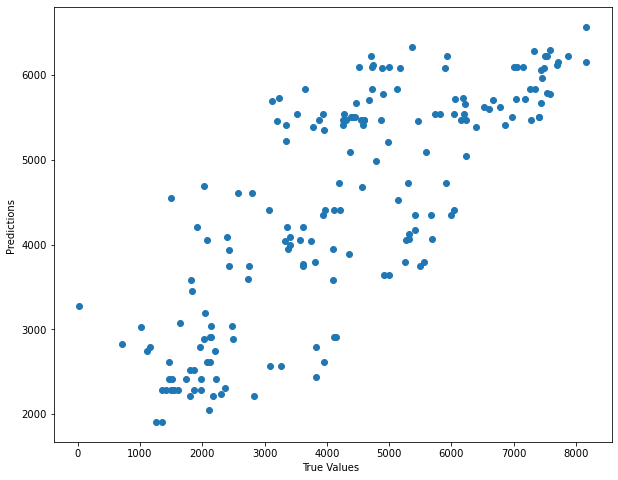

In [180]:
'''
1. split daily data into training and testing dataset
2. train each model of the models list and print the mae score
3. plot each model's prediction results
'''
X_train_day, X_test_day, y_train_day, y_test_day = split_data(data_day)
pred_list_day = train_model(X_train_day, X_test_day, y_train_day, y_test_day)
plot_pred(y_test_day, pred_list_day)

In [181]:
# build a random forest regressor model separately since it has best mae score in hourly dataset
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_hr, y_train_hr)
pred = rf.predict(X_test_hr)
print(mean_absolute_error(y_test_hr, pred))

43.41277652474109


In [182]:
# check the model's current hyperparameters
rf.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [189]:
# use randomizedsearchcv to find the best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators':np.arange(100,500,10),
          'min_samples_leaf':np.arange(1,15,2),
          'min_samples_split' : [2,3,4,5,6,7],
          'max_depth': np.arange(10, 200, 5),
          'bootstrap': [True, False]}

best_rf = RandomizedSearchCV(rf, params, cv=5, verbose=1)
best_rf.fit(X_train_hr,y_train_hr)
best_param= best_rf.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [190]:
best_param

{'n_estimators': 430,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 50,
 'bootstrap': True}

In [191]:
# rebuild the model with best hyperparameters
rf = RandomForestRegressor(min_samples_leaf=1, 
                           min_samples_split=2, 
                           n_estimators=430, 
                           bootstrap= True,
                           max_depth= 50,
                           random_state=42)
rf.fit(X_train_hr, y_train_hr)
pred_best = rf.predict(X_test_hr)
print(mean_absolute_error(y_test_hr, pred_best))


43.38088511593074


In [192]:
# build a gradient boosting regressor model separately since it has best mae score in daily dataset
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_day, y_train_day)
pred_day = gb.predict(X_test_day)
print(mean_absolute_error(y_test_day, pred_day))

1017.574935792724


In [193]:
# get the model's current hyperparameters
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [194]:
# use randomizedsearchcv to find the best hyperparameters
params = {'n_estimators':np.arange(100,500,10),
          'min_samples_leaf':np.arange(1,15,2),
          'min_samples_split' : [2,4,8],
          'max_depth':np.arange(10, 200, 15),
          'learning_rate': [0.01,0.1,0.5],
          'subsample': [1.0, 0.9, 0.5, 0.3, 0.1],
          }

best_gb = RandomizedSearchCV(gb, params, cv=5, verbose=1)
best_gb.fit(X_train_day,y_train_day)
best_param= best_gb.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [195]:
best_param

{'subsample': 0.9,
 'n_estimators': 290,
 'min_samples_split': 8,
 'min_samples_leaf': 9,
 'max_depth': 115,
 'learning_rate': 0.01}

In [196]:
# rebuild the model with best hyperparameters
gb_best = GradientBoostingRegressor(learning_rate=0.01, 
                               max_depth=10, 
                               min_samples_split=8,
                               min_samples_leaf=1,
                               n_estimators=470, 
                               subsample=0.3, 
                               random_state=42)
gb_best.fit(X_train_day, y_train_day)
pred_day_best = gb_best.predict(X_test_day)
print(mean_absolute_error(y_test_day, pred_day_best))

998.6556735832268


# 5. Stage 5 - Evaluate

As we can see from the results of the models, the best model for the hourly bike rental dataset is RandomforestRegressor with the minimum mean absolute score of 43.38, and the best model for the daily bike rental dataset is GradientBoostingRegressor with the minimum mean absolute score of 998.66. It is not difficult to find that the tree-based models like random forest and gradient boost model have a better performance. The reason for this is that tree-based models are better at capturing nonlinear relationships. For our dataset, not all the variables have a linear relationship. For example, based on our heatmap, temperature and bike rental amounts have highly positive correlations. However, this kind of relationship is not linear. It is not the case that the higher the temperature, the higher the number of rental bikes. If the temperature is extremely high, the number of rental bikes decreases. Therefore, a linear regressor is not the best option for this type of data.  

Besides, the reason we use the RandomizedSearchCV method to find the best hyperparameters is it can save a lot of time. We have many parameters to search for, so if we use the GridsearchCV method, it will going to take a couple of hours to find the best hyperparameters. For the current study, we aim to reduce the mean absolute score as much as possible, and if the model is to be deployed and put into use in the future, we can consider using GridSearchCV to find the best hyperparameters.  

#### In conclusion, based on the result of the model test, the random forest model is best for predicting the bike rental amount on an hourly basis, and the gradient boost model is best for predicting the bike rental amount on daily basis. The daily bike rental dataset only contains 731 rows. It might not enough for the model to learn. We could consider using more data to train the model in future studies. Overall, we could say the model can roughly predict the demand for rental bikes at each station, which can be used as a reference for companies to place shared bikes, so we achieve our original business goal.¶

# 6. Stage 6 - Deploy

This assessment is similar to the previous two assessments except we have two datasets this time. I think the most difficult part for me is how to choose a appropriate model. I have no idea what model I should use to train each dataset. So, I figure out a way to solve this problem. I create a model list and loop each model in the list. I finally found the best model for each dataset. This assignment is more challenging for me, not only because it has two datasets, but also because there is no specified model can be used. 
This is the last assignment for this course. I think I learned a lot from this course. I can skillfully organize data, train models, and optimize model parameters. I think the assignments I did in this course will also help me in my future career. I really appreciate that I took this course and have a deeper understanding of the machine learning field. 
